<a href="https://colab.research.google.com/github/DhrubaAdhikary/Learn_CV_with_Dhruv/blob/master/CV7_SIFT_feature_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step-by-step Python implementation of blob detection using the Difference of Gaussians (DoG), which is part of the SIFT algorithm**

Import Libraries and Load Image

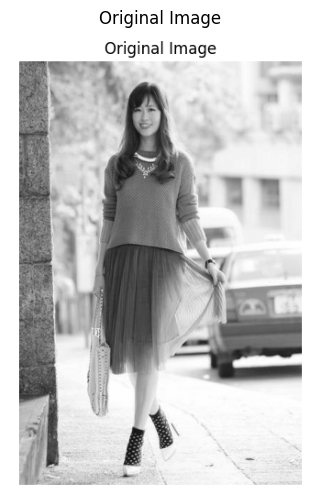

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/sift demo 1.png', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


Create a Scale-Space Using Gaussian Blurs

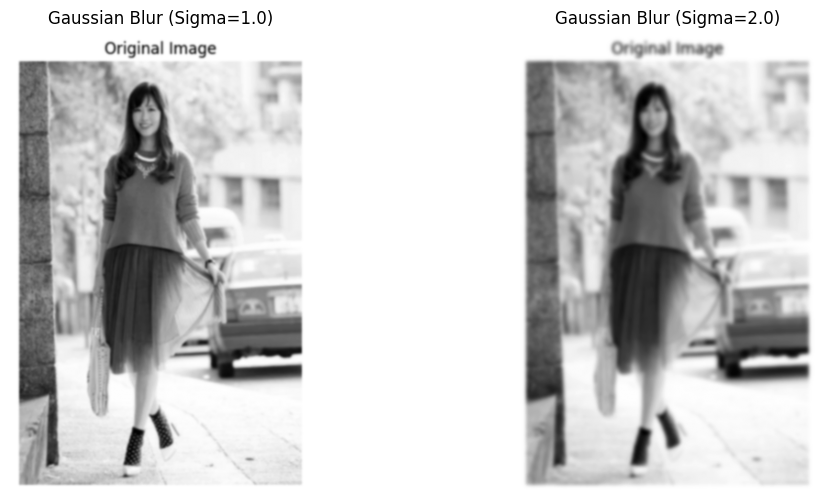

In [2]:
# Apply Gaussian Blur at different sigma values
sigma1 = 1.0  # Small sigma
sigma2 = 2.0  # Larger sigma

# Blur the image with different Gaussian kernels
gaussian1 = cv2.GaussianBlur(image, (0, 0), sigmaX=sigma1, sigmaY=sigma1)
gaussian2 = cv2.GaussianBlur(image, (0, 0), sigmaX=sigma2, sigmaY=sigma2)

# Display the blurred images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title(f'Gaussian Blur (Sigma={sigma1})')
plt.imshow(gaussian1, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Gaussian Blur (Sigma={sigma2})')
plt.imshow(gaussian2, cmap='gray')
plt.axis('off')
plt.show()


Compute the Difference of Gaussians (DoG)


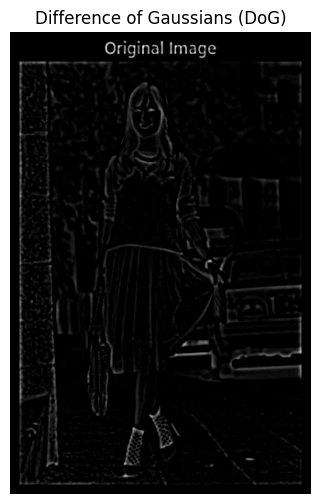

In [3]:
# Compute the Difference of Gaussians (DoG)
dog = cv2.subtract(gaussian2, gaussian1)

# Display the DoG result
plt.figure(figsize=(6, 6))
plt.title("Difference of Gaussians (DoG)")
plt.imshow(dog, cmap='gray')
plt.axis('off')
plt.show()


Detect Blobs (Local Extrema in DoG)

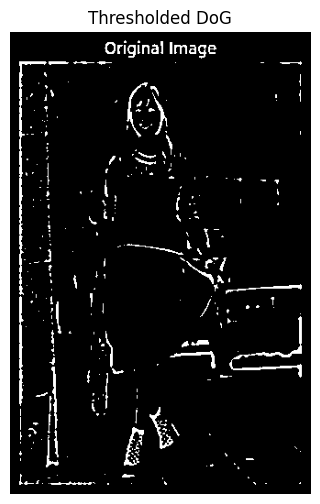

In [4]:
# Threshold the DoG image to highlight potential blobs
threshold = 10  # Adjust this value based on the image
_, dog_threshold = cv2.threshold(np.abs(dog), threshold, 255, cv2.THRESH_BINARY)

# Display the thresholded DoG
plt.figure(figsize=(6, 6))
plt.title("Thresholded DoG")
plt.imshow(dog_threshold, cmap='gray')
plt.axis('off')
plt.show()


Highlight Detected Blobs on the Original Image

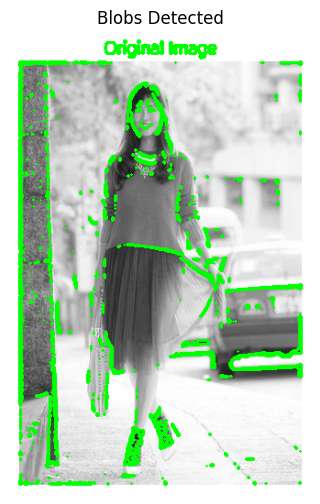

In [5]:
# Find contours of the blobs
contours, _ = cv2.findContours(dog_threshold.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
image_with_blobs = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to color to draw in RGB
cv2.drawContours(image_with_blobs, contours, -1, (0, 255, 0), 2)

# Display the image with blobs highlighted
plt.figure(figsize=(6, 6))
plt.title("Blobs Detected")
plt.imshow(cv2.cvtColor(image_with_blobs, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# SIFT (Scale-Invariant Feature Transform) - Feature matching

Because SIFT Algo is not available in opencv as its patented but its present in opencv_contrib-python,hence we pip install the same

In [6]:
!pip install opencv-contrib-python

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

## Make sure to change the uploaded image and crop name

In [9]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving cropped sift.png to cropped sift.png
User uploaded file "cropped sift.png" with length 41608 bytes


-----------------------IMAGE-----------------------


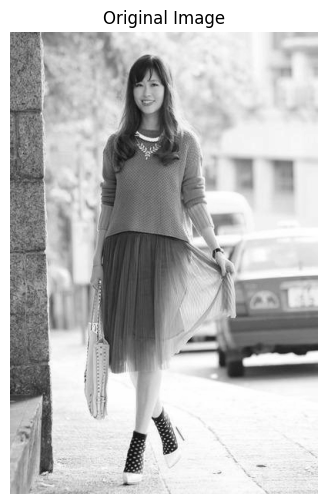


-----------------------TEMPLATE-----------------------


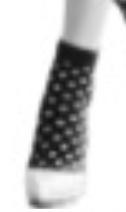

In [10]:
img = cv2.imread('/content/sift demo 1.png',1)

template = cv2.imread('/content/cropped sift.png',1)


print('-----------------------IMAGE-----------------------')
cv2_imshow(img)

print('\n-----------------------TEMPLATE-----------------------')
cv2_imshow(template)

initiate SIFT detector

In [11]:
sift = cv2.SIFT_create()

In [12]:
kp1, des1 = sift.detectAndCompute(img,None)
kp2, des2 = sift.detectAndCompute(template,None)

In [13]:
# BF(brute force)Matcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [14]:
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])

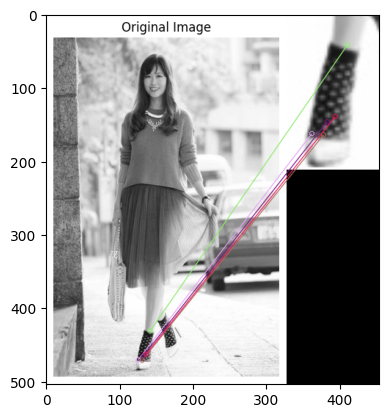

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


In [15]:

img3 = cv2.drawMatchesKnn(img,kp1,template,kp2,good,None,flags=2)
plt.imshow(img3)
plt.show()

%time

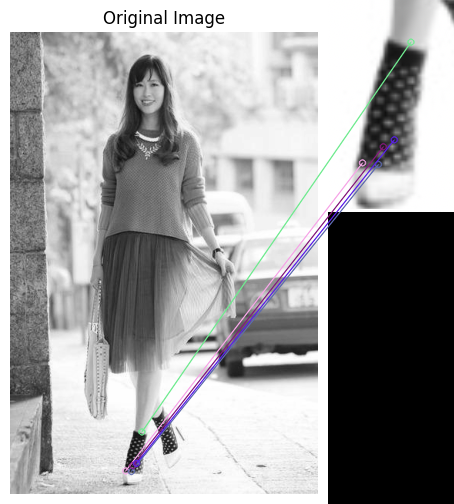

In [16]:
cv2_imshow(img3)

# Now lets rotate the template image by 90 degree and run SIFT on it,
This is better than template matching of opencv because template matching can do adjustments only upto 10 degree

In [17]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving rotated sift.png to rotated sift.png
User uploaded file "rotated sift.png" with length 37853 bytes


### Make sure to change the name of the uploaded image in the img and template_rotate  variables

-----------------------IMAGE-----------------------


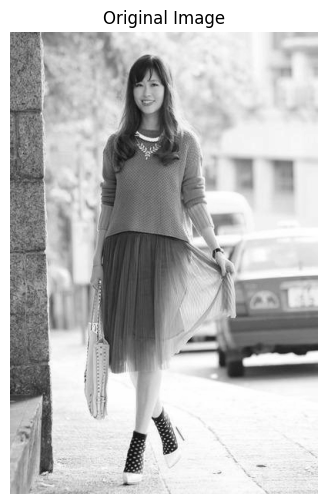


-----------------------TEMPLATE ROTATED BY 90 Degree-----------------------


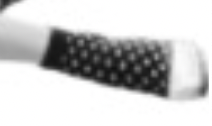

In [18]:
img = cv2.imread('/content/sift demo 1.png',1)

template_rotate= cv2.imread('/content/rotated sift.png',1)


print('-----------------------IMAGE-----------------------')
cv2_imshow(img)

print('\n-----------------------TEMPLATE ROTATED BY 90 Degree-----------------------')
cv2_imshow(template_rotate)

In [19]:
kp1, des1 = sift.detectAndCompute(img,None)
kp2, des2 = sift.detectAndCompute(template_rotate,None)

In [20]:

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [21]:
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.3*n.distance:
        good.append([m])

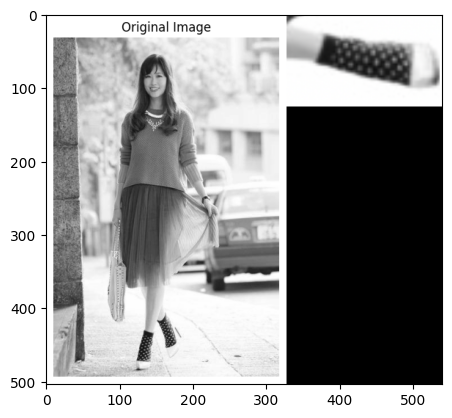

In [22]:
res2 = cv2.drawMatchesKnn(img,kp1,template_rotate,kp2,good,None,flags=2)
plt.imshow(res2)
plt.show()

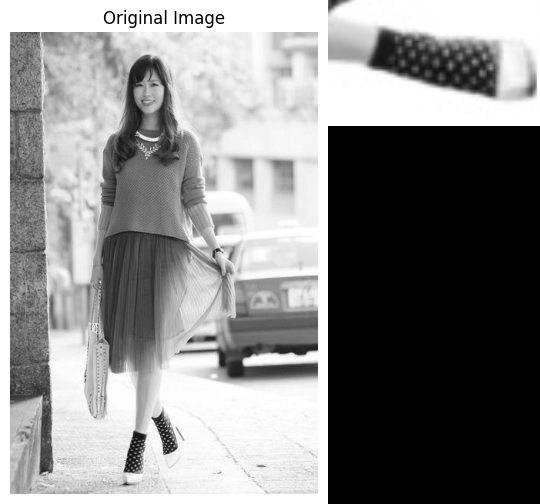

In [23]:
cv2_imshow(res2)

## We can clearly see that even though the image template has been rotated yet it captured the match in the image, although the back leg has not been matched

## The above undetected back leg can be solved by increasing the threshold although the noise make it indistinguishable

In [24]:
good1 = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good1.append([m])


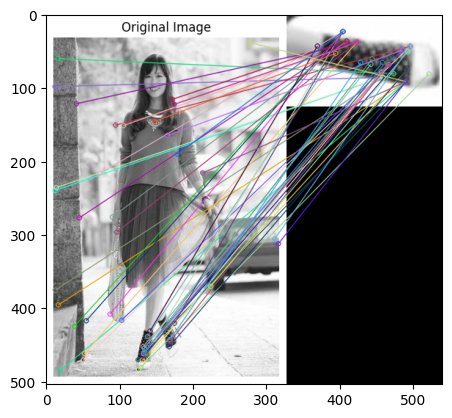

In [25]:
res3 = cv2.drawMatchesKnn(img,kp1,template_rotate,kp2,good1,None,flags=2)
plt.imshow(res3)
plt.show()

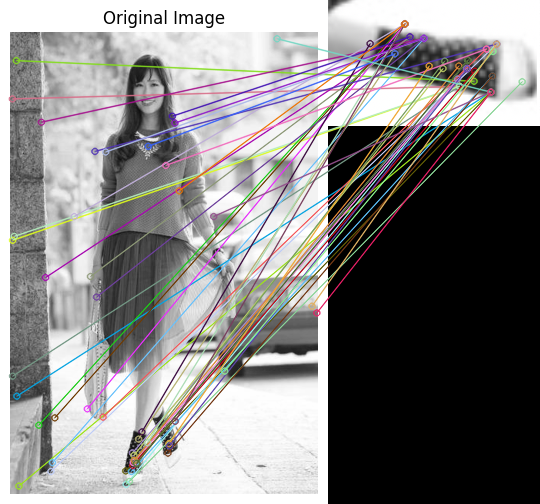

In [26]:
cv2_imshow(res3)

## In the above image we can see that both the front and back leg is detected along with some noise and FP points